In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
olympic_df = pd.read_csv('../CSV_In_Progress/Machine_Learning_dataset.csv')
olympic_df = olympic_df.drop(['Unnamed: 0'], axis=1)

In [4]:
# Sort for Winter Olympics Results
winter_olympic_df = olympic_df[olympic_df['Season'] == 'Winter']
winter_olympic_df

,NOC,Year,Season,Host,athlete_count,Population,GDP per capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share
1611,ALB,2006,Winter,0,3,2992547.0,7347.33,0.0,0.0,0.0,0.0,252.0,0.000000
1612,ALG,2006,Winter,0,3,33641007.0,10385.78,0.0,0.0,0.0,0.0,252.0,0.000000
1613,ARG,2006,Winter,0,17,39289876.0,16490.47,0.0,0.0,0.0,0.0,252.0,0.000000
1614,ARM,2006,Winter,0,8,2958301.0,8798.75,0.0,0.0,0.0,0.0,252.0,0.000000
1615,AUS,2006,Winter,0,40,20697900.0,42650.99,1.0,0.0,1.0,2.0,252.0,0.007937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,TUR,2002,Winter,0,5,65145357.0,11753.95,0.0,0.0,0.0,0.0,234.0,0.000000
2499,UKR,2002,Winter,0,79,48202470.0,6262.98,0.0,0.0,0.0,0.0,234.0,0.000000
2500,USA,2002,Winter,1,232,287625193.0,46266.30,10.0,13.0,11.0,34.0,234.0,0.145299
2501,UZB,2002,Winter,0,6,25271850.0,4777.29,0.0,0.0,0.0,0.0,234.0,0.000000


In [25]:
winter_olympic_df['lnPopulation'] = np.log2(winter_olympic_df['Population'])
winter_olympic_df

C:\Users\benja\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NOC,Year,Season,Host,athlete_count,Population,GDP per capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,lnPopulation
1611,ALB,2006,Winter,0,3,2992547.0,7347.33,0.0,0.0,0.0,0.0,252.0,0.000000,21.512942
1612,ALG,2006,Winter,0,3,33641007.0,10385.78,0.0,0.0,0.0,0.0,252.0,0.000000,25.003718
1613,ARG,2006,Winter,0,17,39289876.0,16490.47,0.0,0.0,0.0,0.0,252.0,0.000000,25.227654
1614,ARM,2006,Winter,0,8,2958301.0,8798.75,0.0,0.0,0.0,0.0,252.0,0.000000,21.496337
1615,AUS,2006,Winter,0,40,20697900.0,42650.99,1.0,0.0,1.0,2.0,252.0,0.007937,24.302981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,TUR,2002,Winter,0,5,65145357.0,11753.95,0.0,0.0,0.0,0.0,234.0,0.000000,25.957159
2499,UKR,2002,Winter,0,79,48202470.0,6262.98,0.0,0.0,0.0,0.0,234.0,0.000000,25.522604
2500,USA,2002,Winter,1,232,287625193.0,46266.30,10.0,13.0,11.0,34.0,234.0,0.145299,28.099615
2501,UZB,2002,Winter,0,6,25271850.0,4777.29,0.0,0.0,0.0,0.0,234.0,0.000000,24.591028


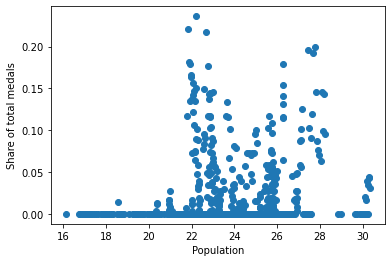

In [26]:
# Athlete Count vs medal share plot
plt.scatter(winter_olympic_df.lnPopulation, winter_olympic_df.medal_share)
plt.xlabel('Population')
plt.ylabel('Share of total medals')
plt.show()

In [27]:
X = winter_olympic_df.lnPopulation.values.reshape(-1, 1)

In [28]:
X[:5]

array([[21.51294248],
       [25.00371756],
       [25.22765428],
       [21.49633742],
       [24.30298106]])

In [29]:
X.shape

(711, 1)

In [30]:
y = winter_olympic_df.medal_share

In [31]:
# Create a model with scikit-learn
model = LinearRegression()

In [32]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [33]:
y_pred = model.predict(X)

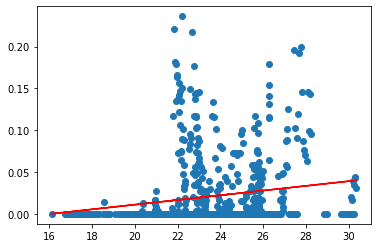

In [34]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [35]:
r2 = model.score(X, y)
r2

0.027511686234565458

In [23]:
y_pred = model.predict(X)
y_pred
# print('Predicted response:', y_pred, sep='\n')

array([0.02050746, 0.02083797, 0.02089889, 0.02050709, 0.02069839,
       0.02056436, 0.02056669, 0.02058894, 0.0205158 , 0.02057877,
       0.02250436, 0.02055716, 0.02082643, 0.02047684, 0.02065156,
       0.03461307, 0.02052205, 0.02052168, 0.02048647, 0.02058561,
       0.02053383, 0.02095397, 0.02048971, 0.02132161, 0.02053198,
       0.02116128, 0.02113136, 0.02051704, 0.02136353, 0.02059403,
       0.02054914, 0.0205838 , 0.03304365, 0.02052128, 0.02047847,
       0.02055126, 0.02110221, 0.02185395, 0.02064027, 0.02088119,
       0.02053147, 0.02099754, 0.02049911, 0.02051045, 0.02048029,
       0.02067879, 0.02050625, 0.02050279, 0.02049719, 0.02065147,
       0.02075629, 0.02052545, 0.02052032, 0.0208865 , 0.02058866,
       0.0207346 , 0.02070374, 0.0209981 , 0.02201782, 0.02059794,
       0.02049683, 0.0205559 , 0.02053313, 0.02057311, 0.02118491,
       0.02054984, 0.02121666, 0.02097974, 0.02369288, 0.02076084,
       0.02076474, 0.0205066 , 0.02086317, 0.02091505, 0.02050